# First come first serve scheduling algorithm
## Pasco, Jericho C.
## Salde, Stella Marie

In [1]:
import matplotlib.pyplot as plt

In [2]:
# FCFS Scheduling Function
def fcfs(process_list):
    time = 0
    gantt = []
    completed = {}
    process_timeline = []

    total_waiting_time = 0
    total_turn_around_time = 0

    # Sort processes by arrival time
    process_list.sort()
    
    # Processing each process
    while process_list:
        if process_list[0][0] > time:
            time += 1
            gantt.append("Idle")
            continue
        else:
            process = process_list.pop(0)
            process_id = process[2]
            gantt.append(process_id)  # Append process id to Gantt chart
            process_start_time = time
            time += process[1]
            completion_time = time
            turn_around_time = completion_time - process[0]
            waiting_time = turn_around_time - process[1]
            completed[process_id] = [completion_time, turn_around_time, waiting_time]
            
            # Add to timeline for plotting
            process_timeline.append((process_id, process_start_time, process[1]))

            total_waiting_time += waiting_time
            total_turn_around_time += turn_around_time

    # Calculate averages
    average_waiting_time = total_waiting_time / len(completed)
    average_turn_around_time = total_turn_around_time / len(completed)

    return gantt, completed, process_timeline, average_waiting_time, average_turn_around_time

In [3]:
# Gantt Chart Plotting Function
def plot_gantt_chart(process_timeline, completed):
    # Calculate total time as the completion time of the last process
    total_time = max(start + duration for _, start, duration in process_timeline)
    
    fig, ax = plt.subplots(figsize=(10, 3))
    
    for process_id, start, duration in process_timeline:
        ax.broken_barh([(start, duration)], (10, 9), facecolors=('tab:blue'), label=process_id)
        ax.text(start + duration / 2, 15, process_id, ha='center', va='center', color='white')
        
        # Add a vertical line at the completion time
        completion_time = start + duration
        ax.axvline(completion_time, color='red', linestyle='--')
        ax.text(completion_time, 20, f'{completion_time}', ha='center', va='bottom', color='red')

    ax.set_ylim(5, 25)
    ax.set_xlim(0, total_time)
    ax.set_xlabel("Time")
    ax.set_yticks([])
    ax.set_title("Gantt Chart for FCFS Scheduling with Completion Times")

    plt.show()

In [4]:
process_list = [[0, 8, "A"], [3, 4, "B"], [4, 5, "C"], [6, 3, "D"], [10, 2, "E"]]

In [5]:
gantt, completed, process_timeline, avg_waiting_time, avg_turnaround_time = fcfs(process_list)

In [6]:
# Print Gantt Chart and completion details
for i in range(1, len(completed) + 1):
    gantt_display = " | ".join(gantt[:i])
    print(gantt_display)

    # Print the completion times for each process up to the current one
    completion_time_display = " | ".join(
        f"{completed[process_id][0]}" for process_id in list(completed.keys())[:i]
    )
    print(completion_time_display)
    print()  # Add a newline for readability


A
8

A | B
8 | 12

A | B | C
8 | 12 | 17

A | B | C | D
8 | 12 | 17 | 20

A | B | C | D | E
8 | 12 | 17 | 20 | 22



In [7]:
print("Average Waiting Time:", avg_waiting_time)
print("Average Turn Around Time:", avg_turnaround_time)

Average Waiting Time: 6.8
Average Turn Around Time: 11.2


In [8]:
print("Completed Processes with Details:")
for process_id, details in completed.items():
    print(f"Process {process_id}: Completion Time = {details[0]}, Turn Around Time = {details[1]}, Waiting Time = {details[2]}")

Completed Processes with Details:
Process A: Completion Time = 8, Turn Around Time = 8, Waiting Time = 0
Process B: Completion Time = 12, Turn Around Time = 9, Waiting Time = 5
Process C: Completion Time = 17, Turn Around Time = 13, Waiting Time = 8
Process D: Completion Time = 20, Turn Around Time = 14, Waiting Time = 11
Process E: Completion Time = 22, Turn Around Time = 12, Waiting Time = 10


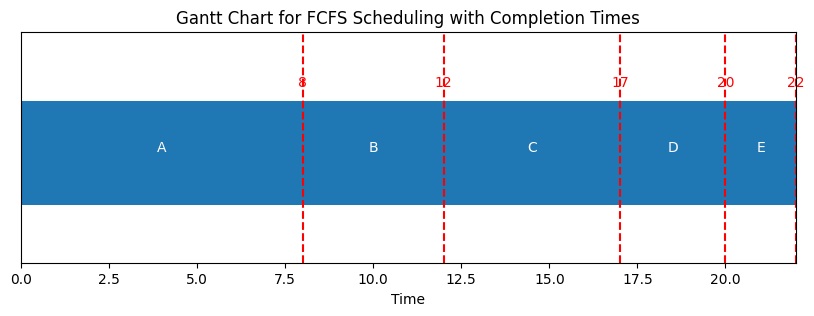

In [9]:
# Plot the Gantt chart
plot_gantt_chart(process_timeline, completed)